In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
from sklearn.metrics import accuracy_score, f1_score, classification_report
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA


In [5]:
#loading datasets

train_x = pd.read_csv('train_X.csv') #input features for training model
train_y = pd.read_csv('train_y.csv') #labels for training data
test_x = pd.read_csv('test_X.csv') #input features we want to make predictions for

print(test_x.columns)

print(train_x.head())
print(train_y.head())
print(test_x.head())

#drop unnamed: 0 and extract features and labels
train_x_droped = train_x.drop(columns=['Unnamed: 0'])
test_x_droped = test_x.drop(columns=['Unnamed: 0'])
train_y_droped = train_y.drop(columns=['Unnamed: 0'])

y = train_y.values.ravel() #1D data frame with target labels

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)



Index(['Unnamed: 0', 'ENSG00000000003', 'ENSG00000000005', 'ENSG00000000419',
       'ENSG00000000457', 'ENSG00000000938', 'ENSG00000000971',
       'ENSG00000001036', 'ENSG00000001084', 'ENSG00000001167',
       ...
       'ENSG00000282651', 'ENSG00000282815', 'ENSG00000282939',
       'ENSG00000283063', 'ENSG00000283439', 'ENSG00000283463',
       'ENSG00000283526', 'ENSG00000283586', 'ENSG00000283632',
       'ENSG00000283697'],
      dtype='object', length=17971)
                             Unnamed: 0  ENSG00000000003  ENSG00000000005  \
0  EB0D68BC-5FF9-44A5-A355-CA5441BFBA0A         7.062725         0.026623   
1  0876B4BB-58BA-4C4C-84F4-E9D19EF96147         5.965392        -5.431256   
2  EACD1021-7B52-4531-8806-B7555B73AC84         7.892221        -5.851870   
3  368ACD26-C7FB-4974-BB7F-0AE22670CB0E         6.826546         0.964851   
4  F23B0A1A-25AE-41D9-8C49-B692C4FDE1E4         7.059095         2.429954   

   ENSG00000000419  ENSG00000000457  ENSG00000000938  ENSG0000000

In [40]:
#splitting the training data into training and validation sets
#20% of the data is being used to evaluate the model, 80% for training
x_train, x_val, y_train, y_val = train_test_split(train_x_droped, train_y_droped, test_size =0.2, random_state = 50)

#defining dictionary with Logistic Regression, ridge Regression, lasso regression
models = {"Logistic Regression": LogisticRegression(),
    "Ridge Regression": RidgeClassifier(),
    "Lasso Regression": Lasso(alpha=0.1)}

#dictionary to store model performance
model_performance = {}

#pipeline, model name and model - key value pairs 
for model_name, model in models.items():
    pipeline = Pipeline([('scaler', StandardScaler()),  ('classifier', model)])          
    
    
    pipeline.fit(x_train, y_train.values.ravel()) #trains the pipeline
    
  
    y_pred = pipeline.predict(x_val) #make predictions on validation set 

    if model_name == "Lasso Regression":
        y_pred = (y_pred > 0.5).astype(int) #converts to binary predictions
    
    accuracy = accuracy_score(y_val, y_pred) #computes accuracy
    f1 = f1_score(y_val, y_pred) #computes f1 score
    
    
    model_performance[model_name] = {'Accuracy': round(accuracy, 4),'F1 Score': round(f1, 4)}


print(model_performance)



{'Logistic Regression': {'Accuracy': 0.7865, 'F1 Score': 0.8155}, 'Ridge Regression': {'Accuracy': 0.7865, 'F1 Score': 0.8119}, 'Lasso Regression': {'Accuracy': 0.7416, 'F1 Score': 0.781}}


In [30]:
#regularization

regularization_values = np.logspace(-4,4,20) #alpha for different models
logistic_accuracies = []
ridge_accuracies = []
lasso_accuracies = []

for alpha in regularization_values:
    #logistic regression
    logistic_model = LogisticRegression(C=1/alpha, max_iter = 10000, class_weight = 'balanced') #class weights balanced to give more importance to minority class
    #as alpha increases, C decreases leading to stronger regularization
    logistic_model.fit(x_train, y_train.values.ravel())
    y_pred_logistic = logistic_model.predict(x_val)
    logistic_accuracy = accuracy_score(y_val, y_pred_logistic)
    logistic_accuracies.append(logistic_accuracy)

     #ridge regression
    ridge_model = RidgeClassifier(alpha=alpha, max_iter = 10000)
    #alpha directly controls the regularization strength 
    ridge_model.fit(x_train, y_train.values.ravel())
    y_pred_ridge = ridge_model.predict(x_val)
    ridge_accuracy = accuracy_score(y_val, y_pred_ridge)
    ridge_accuracies.append(ridge_accuracy)

    #lasso regression
    lasso_model = Lasso(alpha = alpha, max_iter = 10000)
    #alpha controls the regularization
    lasso_model.fit(x_train, y_train.values.ravel())
    y_pred_lasso = lasso_model.predict(x_val)
    y_pred_lasso_binary = (y_pred_lasso > 0.5).astype(int)
    lasso_accuracy = accuracy_score(y_val, y_pred_lasso_binary)
    lasso_accuracies.append(lasso_accuracy)

    
print("Logistic Accuracies: ", ["{:.4f}".format(accuracy) for accuracy in logistic_accuracies])
print("Ridge Accuracies: ", ["{:.4f}".format(accuracy) for accuracy in ridge_accuracies])
print("Lasso Accuracies: ", ["{:.4f}".format(accuracy) for accuracy in lasso_accuracies])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.024e-02, tolerance: 8.706e-03
  model = cd_fast.enet_coordinate_descent(


Logistic Accuracies:  ['0.7640', '0.7640', '0.7640', '0.7640', '0.7640', '0.7640', '0.7640', '0.7753', '0.7640', '0.7865', '0.7978', '0.7978', '0.7978', '0.7978', '0.7978', '0.7978', '0.7978', '0.7978', '0.7978', '0.7640']
Ridge Accuracies:  ['0.7640', '0.7640', '0.7640', '0.7640', '0.7640', '0.7640', '0.7640', '0.7640', '0.7640', '0.7640', '0.7640', '0.7640', '0.7640', '0.7640', '0.7640', '0.7640', '0.7640', '0.7753', '0.7865', '0.7978']
Lasso Accuracies:  ['0.7303', '0.7079', '0.7416', '0.7753', '0.7528', '0.7640', '0.8090', '0.7640', '0.7191', '0.7191', '0.5843', '0.5843', '0.5843', '0.5843', '0.5843', '0.5843', '0.5843', '0.5843', '0.5843', '0.5843']


In [ ]:
#Model Performance:
#Logistic Regression - Accuracy: 0.7865, F1 Score: 0.8155
#Ridge Regression - Accuracy: 0.7865, F1 Score: 0.8119
#Lasso Regression - Accuracy: 0.7416, F1 Score: 0.7810

#The best model based on F1 Score is: Logistic Regression
#Performance: Accuracy: 0.7865, F1 Score: 0.8155


In [36]:
#randomized predictions

y_train_random = np.random.permutation(y_train)
best_model = LogisticRegression(C=1/0.1)
best_model.fit(x_train, y_train_random.ravel())
y_pred_random = best_model.predict(x_val)

random_accuracy = accuracy_score(y_val, y_pred_random)
random_accuracy = round(random_accuracy, 4)
print(random_accuracy)


0.5506


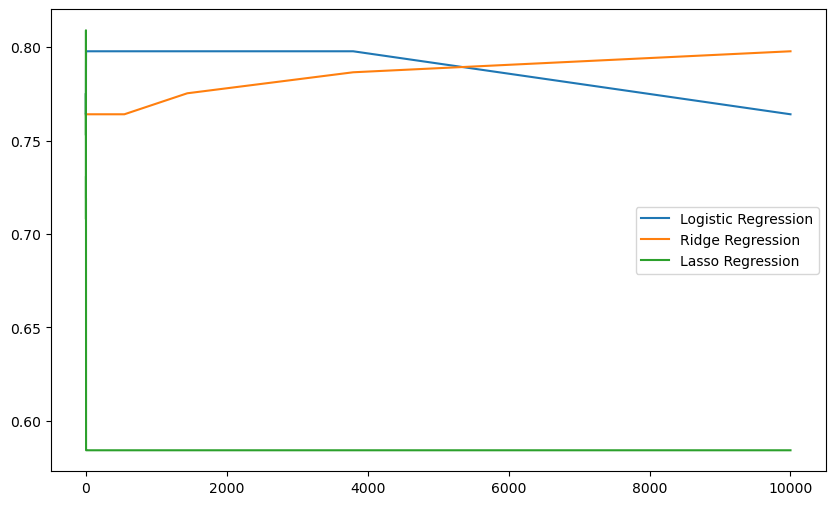

In [32]:
plt.figure(figsize=(10,6))
plt.plot(regularization_values, logistic_accuracies, label = 'Logistic Regression')
plt.plot(regularization_values, ridge_accuracies, label = 'Ridge Regression')
plt.plot(regularization_values, lasso_accuracies, label = 'Lasso Regression')
plt.legend()
plt.show()

#values of alpha is on x axis 
#y axis has the accuracy model 

In [18]:
#Feature importance 

important_features = pd.DataFrame({'Feature': train_x_droped.columns, 'Coefficient': best_model.coef_[0]})

important_features['Absolute Coefficient'] = important_features['Coefficient'].abs()
important_features = important_features.sort_values(by='Absolute Coefficient', ascending = False)

print("Top 10 Important features:") #most import genes for model decision 
print(important_features.head(10))





Top 10 Important features:
               Feature  Coefficient  Absolute Coefficient
9486   ENSG00000156885     0.102605              0.102605
15217  ENSG00000196406     0.095923              0.095923
15162  ENSG00000196224     0.093004              0.093004
8534   ENSG00000147571     0.084303              0.084303
17871  ENSG00000276597     0.080004              0.080004
16392  ENSG00000211713     0.079988              0.079988
8903   ENSG00000151360     0.078136              0.078136
10613  ENSG00000164265     0.076823              0.076823
5148   ENSG00000123407     0.075760              0.075760
17783  ENSG00000273696    -0.074295              0.074295


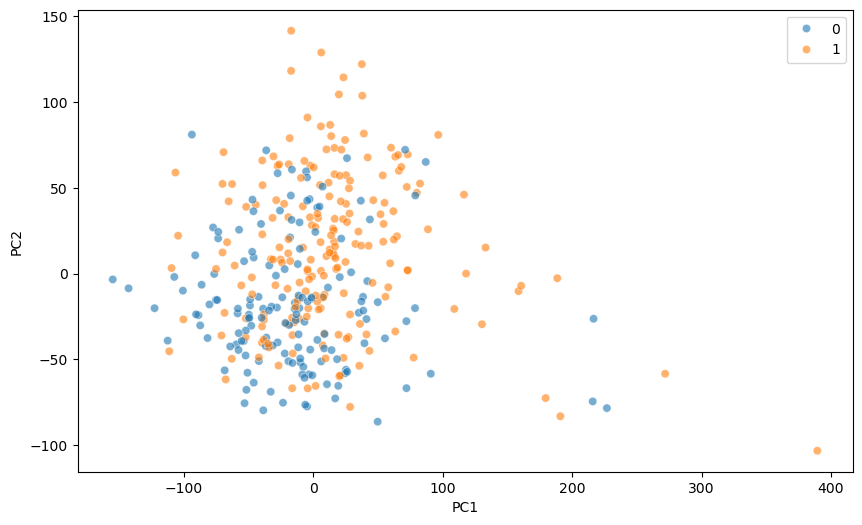

In [38]:
#reduce dimensionality 

pca = PCA(n_components =2)
pca_result = pca.fit_transform(x_train)
pca_df = pd.DataFrame(data=pca_result, columns =['PC1', 'PC2'])
pca_df['Target'] = y_train.values.ravel()


plt.figure(figsize=(10,6))
sns.scatterplot(data=pca_df, x='PC1', y ='PC2', hue='Target', alpha = 0.6)
plt.legend()
plt.show()

In [42]:
best_model = LogisticRegression(C=1/0.1)  
best_model.fit(x_train, y_train.values.ravel()) 
test_predictions = best_model.predict(test_x_droped)  

In [44]:
submission_df = pd.DataFrame({'ID': test_x['Unnamed: 0'], 'xml_neoplasm_histologic_grade': test_predictions})

submission_df.to_csv('submission2.csv', index = False)
